# Tier 2 Eclipse Candidates Analysis

This notebook analyzes planets classified as **Tier 2** for eclipse observations based on their eclipse depth.
We visualize their impact parameter distributions and regime probabilities.

## 1. Import Libraries and Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import gaussian_kde

# Set plot style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 10)
plt.rcParams['font.size'] = 10

In [2]:
# Load MCMC results with impact parameters
mcmc_df = pd.read_csv('../results/mcs_eclipse_impact_parameter_mcmc.csv')
print(f"Loaded {len(mcmc_df)} planets from MCMC results")

# Load regime probabilities
regime_df = pd.read_csv('../results/mcs_occultation_regime_probabilities.csv')
print(f"Loaded {len(regime_df)} planets from regime analysis")

# Load MCS catalog with tier information
mcs_df = pd.read_csv('../../data/raw/Ariel_MCS_Known_2025-07-18.csv')
print(f"Loaded {len(mcs_df)} planets from MCS catalog")

# Check tier columns
tier_cols = [c for c in mcs_df.columns if 'Tier' in c]
print(f"\nTier columns found: {tier_cols}")

Loaded 805 planets from MCMC results
Loaded 805 planets from regime analysis
Loaded 808 planets from MCS catalog

Tier columns found: ['Tier 1 Transits', 'Tier 2 Transits', 'Tier 3 Transits', 'Tier 1 Eclipses', 'Tier 2 Eclipses', 'Tier 3 Eclipses', 'Tier 1 Observations', 'Tier 2 Observations', 'Tier 3 Observations', 'Max Tier']


## 2. Merge Datasets and Filter Tier 2 Eclipse Candidates

In [3]:
# Merge all datasets
merged_df = mcmc_df.merge(
    regime_df[['Planet', 'prob_false_eclipse', 'prob_grazing_eclipse', 'prob_true_eclipse', 'dominant_regime']],
    on='Planet',
    how='left'
).merge(
    mcs_df[['Planet Name', 'Max Tier']],
    left_on='Planet',
    right_on='Planet Name',
    how='left'
)

print(f"\nMerged dataset: {len(merged_df)} planets")
print(f"Max Tier distribution: {merged_df['Max Tier'].value_counts().sort_index()}")


Merged dataset: 805 planets
Max Tier distribution: Max Tier
1    257
2    411
3    137
Name: count, dtype: int64


In [4]:
# Filter for Tier 2 and Tier 3 eclipse candidates separately
tier2_only = merged_df[merged_df['Max Tier'] == 2].copy()
tier3_only = merged_df[merged_df['Max Tier'] == 3].copy()

print("="*80)
print(f"TIER 2 & 3 ECLIPSE CANDIDATES")
print("="*80)
print(f"\nTier 2 candidates (Max Tier = 2): {len(tier2_only)}")
print(f"Tier 3 candidates (Max Tier = 3): {len(tier3_only)}")
print(f"Total: {len(tier2_only) + len(tier3_only)}")

# Sort by probability
tier2_only = tier2_only.sort_values('prob_true_eclipse', ascending=False)
tier3_only = tier3_only.sort_values('prob_true_eclipse', ascending=False)

# Display summary for Tier 2
print(f"\n" + "="*80)
print("TIER 2 CANDIDATES")
print("="*80)
print(f"Observed eclipses: {tier2_only['eclipse_observed'].sum()}")
print(f"Non-observed eclipses: {(~tier2_only['eclipse_observed']).sum()}")
print(f"\nRegime distribution:")
print(tier2_only['dominant_regime'].value_counts())

print(f"\n" + "-"*80)
print("TOP 20 TIER 2 ECLIPSE CANDIDATES")
print("-"*80)
display_cols = ['Planet', 'eclipse_observed', 'b_occ_median', 'k_rp_rs', 
                'prob_false_eclipse', 'prob_grazing_eclipse', 
                'prob_true_eclipse', 'dominant_regime']
print(tier2_only[display_cols].head(20).to_string(index=False))

# Display summary for Tier 3
print(f"\n" + "="*80)
print("TIER 3 CANDIDATES")
print("="*80)
print(f"Observed eclipses: {tier3_only['eclipse_observed'].sum()}")
print(f"Non-observed eclipses: {(~tier3_only['eclipse_observed']).sum()}")
print(f"\nRegime distribution:")
print(tier3_only['dominant_regime'].value_counts())

print(f"\n" + "-"*80)
print("TOP 20 TIER 3 ECLIPSE CANDIDATES")
print("-"*80)
print(tier3_only[display_cols].head(20).to_string(index=False))

TIER 2 & 3 ECLIPSE CANDIDATES

Tier 2 candidates (Max Tier = 2): 411
Tier 3 candidates (Max Tier = 3): 137
Total: 548

TIER 2 CANDIDATES
Observed eclipses: 40
Non-observed eclipses: 371

Regime distribution:
dominant_regime
True Eclipse       382
False Eclipse       17
Grazing Eclipse     12
Name: count, dtype: int64

--------------------------------------------------------------------------------
TOP 20 TIER 2 ECLIPSE CANDIDATES
--------------------------------------------------------------------------------
   Planet  eclipse_observed  b_occ_median  k_rp_rs  prob_false_eclipse  prob_grazing_eclipse  prob_true_eclipse dominant_regime
  K2-232b             False      0.122964 0.088110                 0.0                   0.0                1.0    True Eclipse
TOI-2977b             False      0.101604 0.112436                 0.0                   0.0                1.0    True Eclipse
  KOI-13b              True      0.253577 0.087373                 0.0                   0.0         

## 3. Top 10 Tier 2 Candidates by Regime

Visualize the top 10 Tier 2 eclipse candidates for each regime type separately.

CREATING TOP 10 VISUALIZATIONS BY REGIME - TIER 2

Creating visualization for Top 10 Tier 2 True Eclipse candidates...


/var/folders/1f/bw5yv25n23ndx4ymmhx70qv00000gn/T/ipykernel_23297/3292057522.py:127: UserWarning: Glyph 9733 (\N{BLACK STAR}) missing from font(s) Arial.
  plt.tight_layout(rect=[0, 0, 1, 0.98])
/var/folders/1f/bw5yv25n23ndx4ymmhx70qv00000gn/T/ipykernel_23297/3292057522.py:130: UserWarning: Glyph 9733 (\N{BLACK STAR}) missing from font(s) Arial.
  plt.savefig(filename, dpi=300, bbox_inches='tight')


✓ Saved: ../results/tier2_top10_true_eclipse.png


/Users/zoutongshen/Library/CloudStorage/Dropbox/Academics/03_Research/Ariel/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9733 (\N{BLACK STAR}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


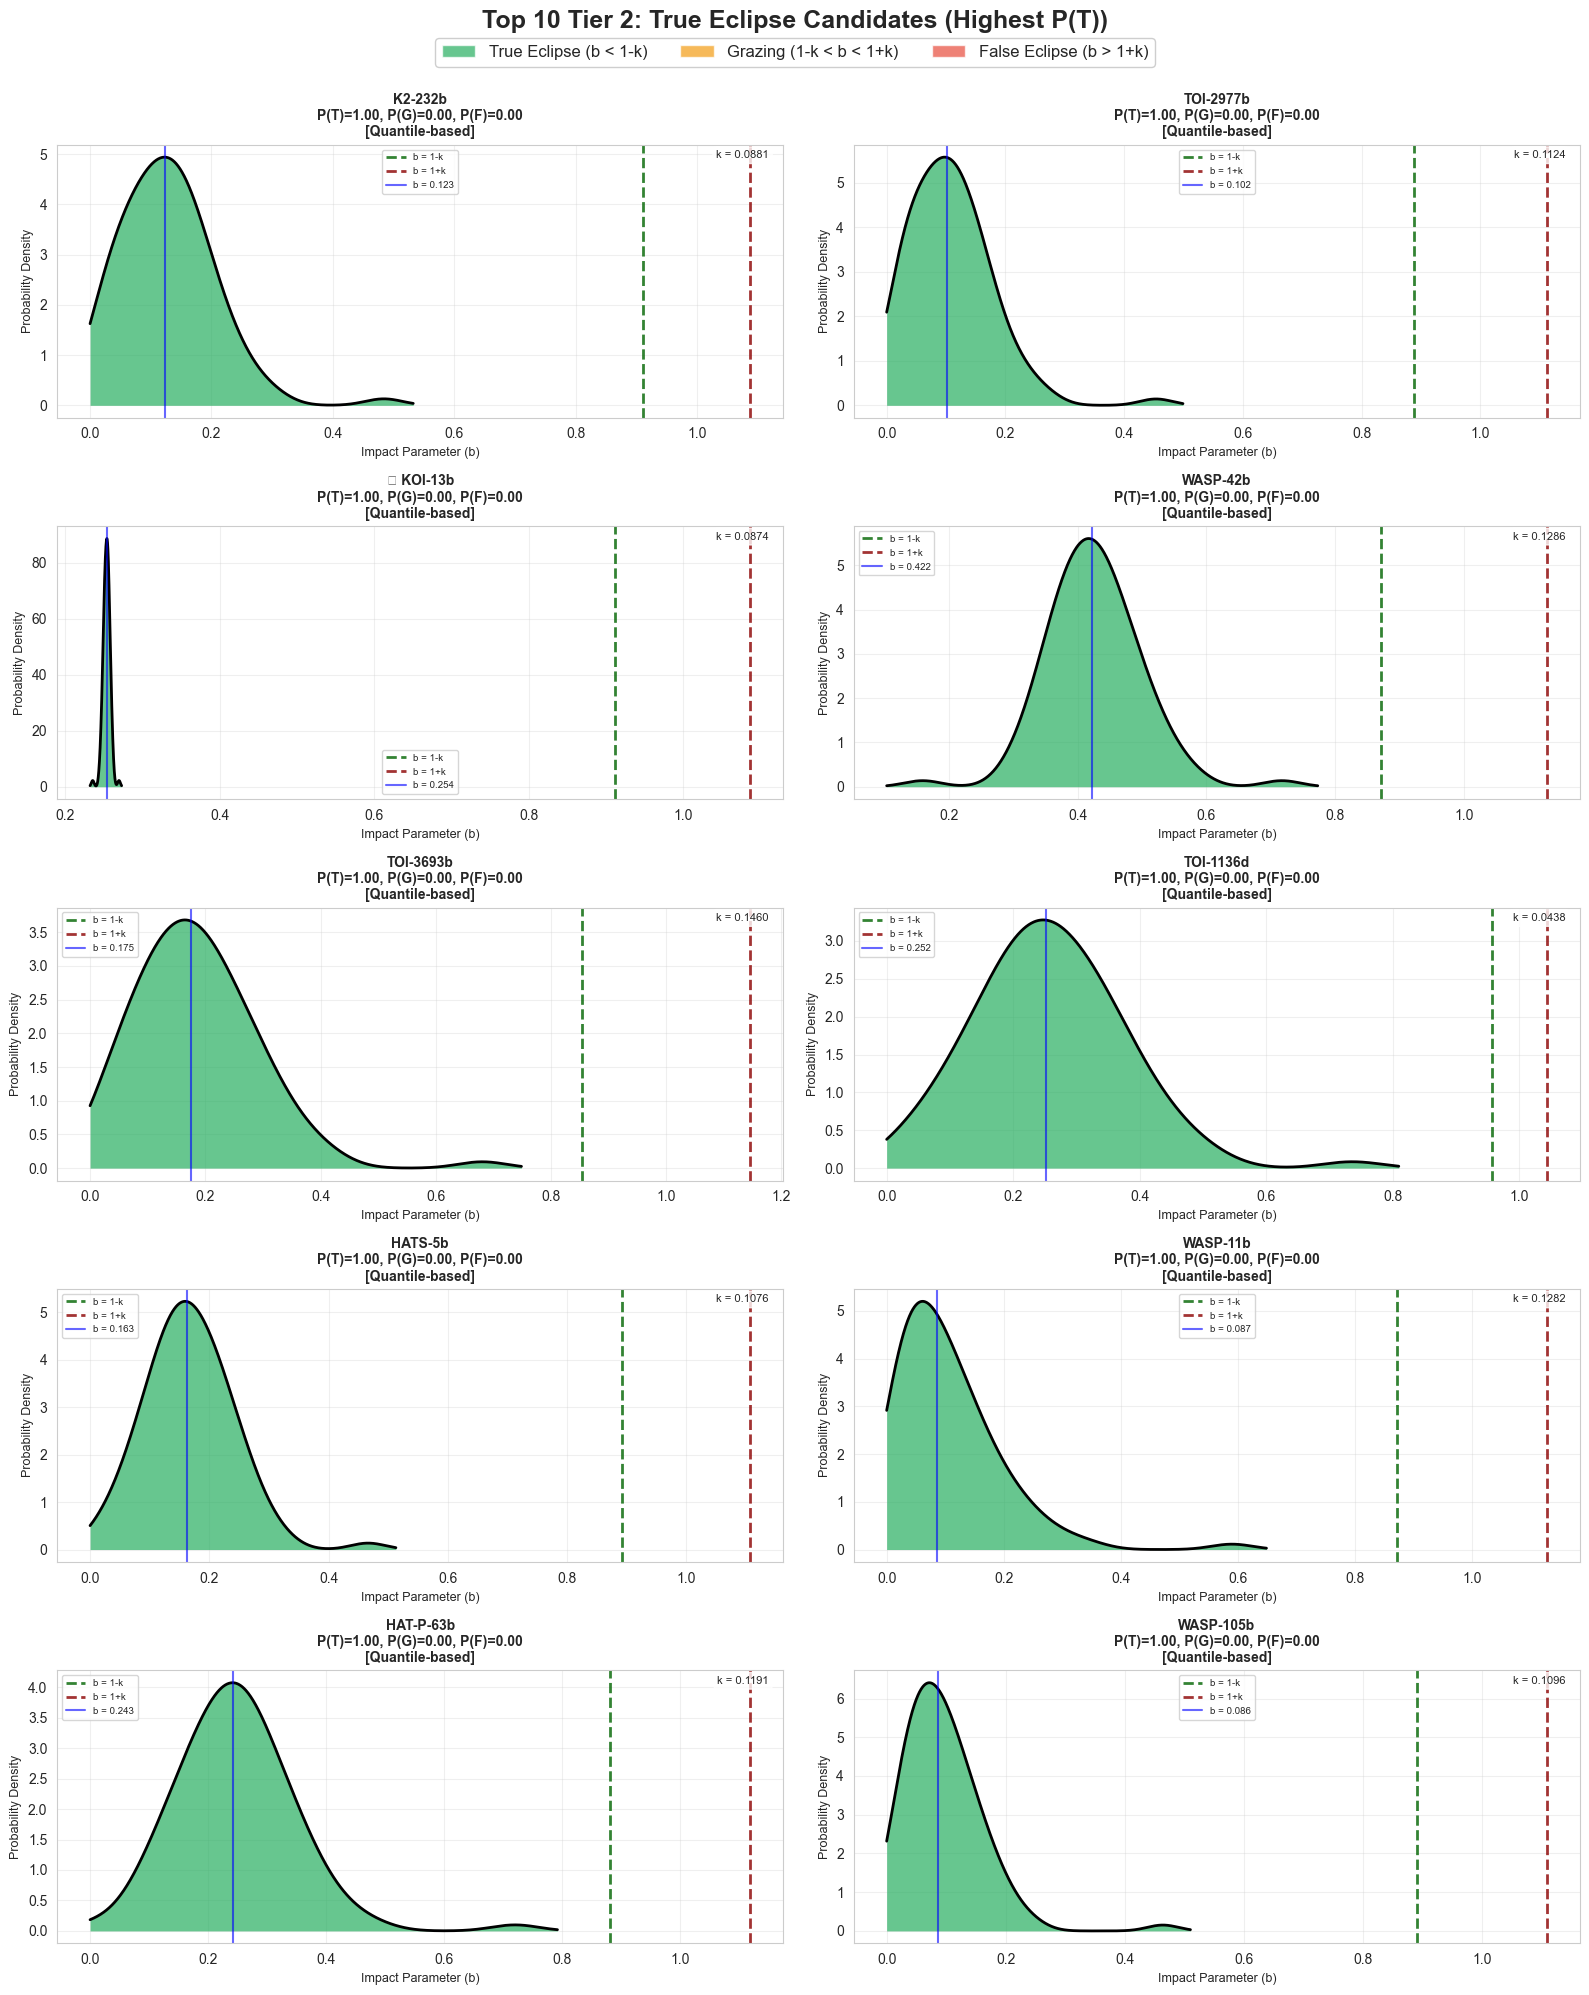


Creating visualization for Top 10 Tier 2 Grazing Eclipse candidates...


/var/folders/1f/bw5yv25n23ndx4ymmhx70qv00000gn/T/ipykernel_23297/3292057522.py:127: UserWarning: Glyph 9733 (\N{BLACK STAR}) missing from font(s) Arial.
  plt.tight_layout(rect=[0, 0, 1, 0.98])
/var/folders/1f/bw5yv25n23ndx4ymmhx70qv00000gn/T/ipykernel_23297/3292057522.py:130: UserWarning: Glyph 9733 (\N{BLACK STAR}) missing from font(s) Arial.
  plt.savefig(filename, dpi=300, bbox_inches='tight')


✓ Saved: ../results/tier2_top10_grazing_eclipse.png


/Users/zoutongshen/Library/CloudStorage/Dropbox/Academics/03_Research/Ariel/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9733 (\N{BLACK STAR}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


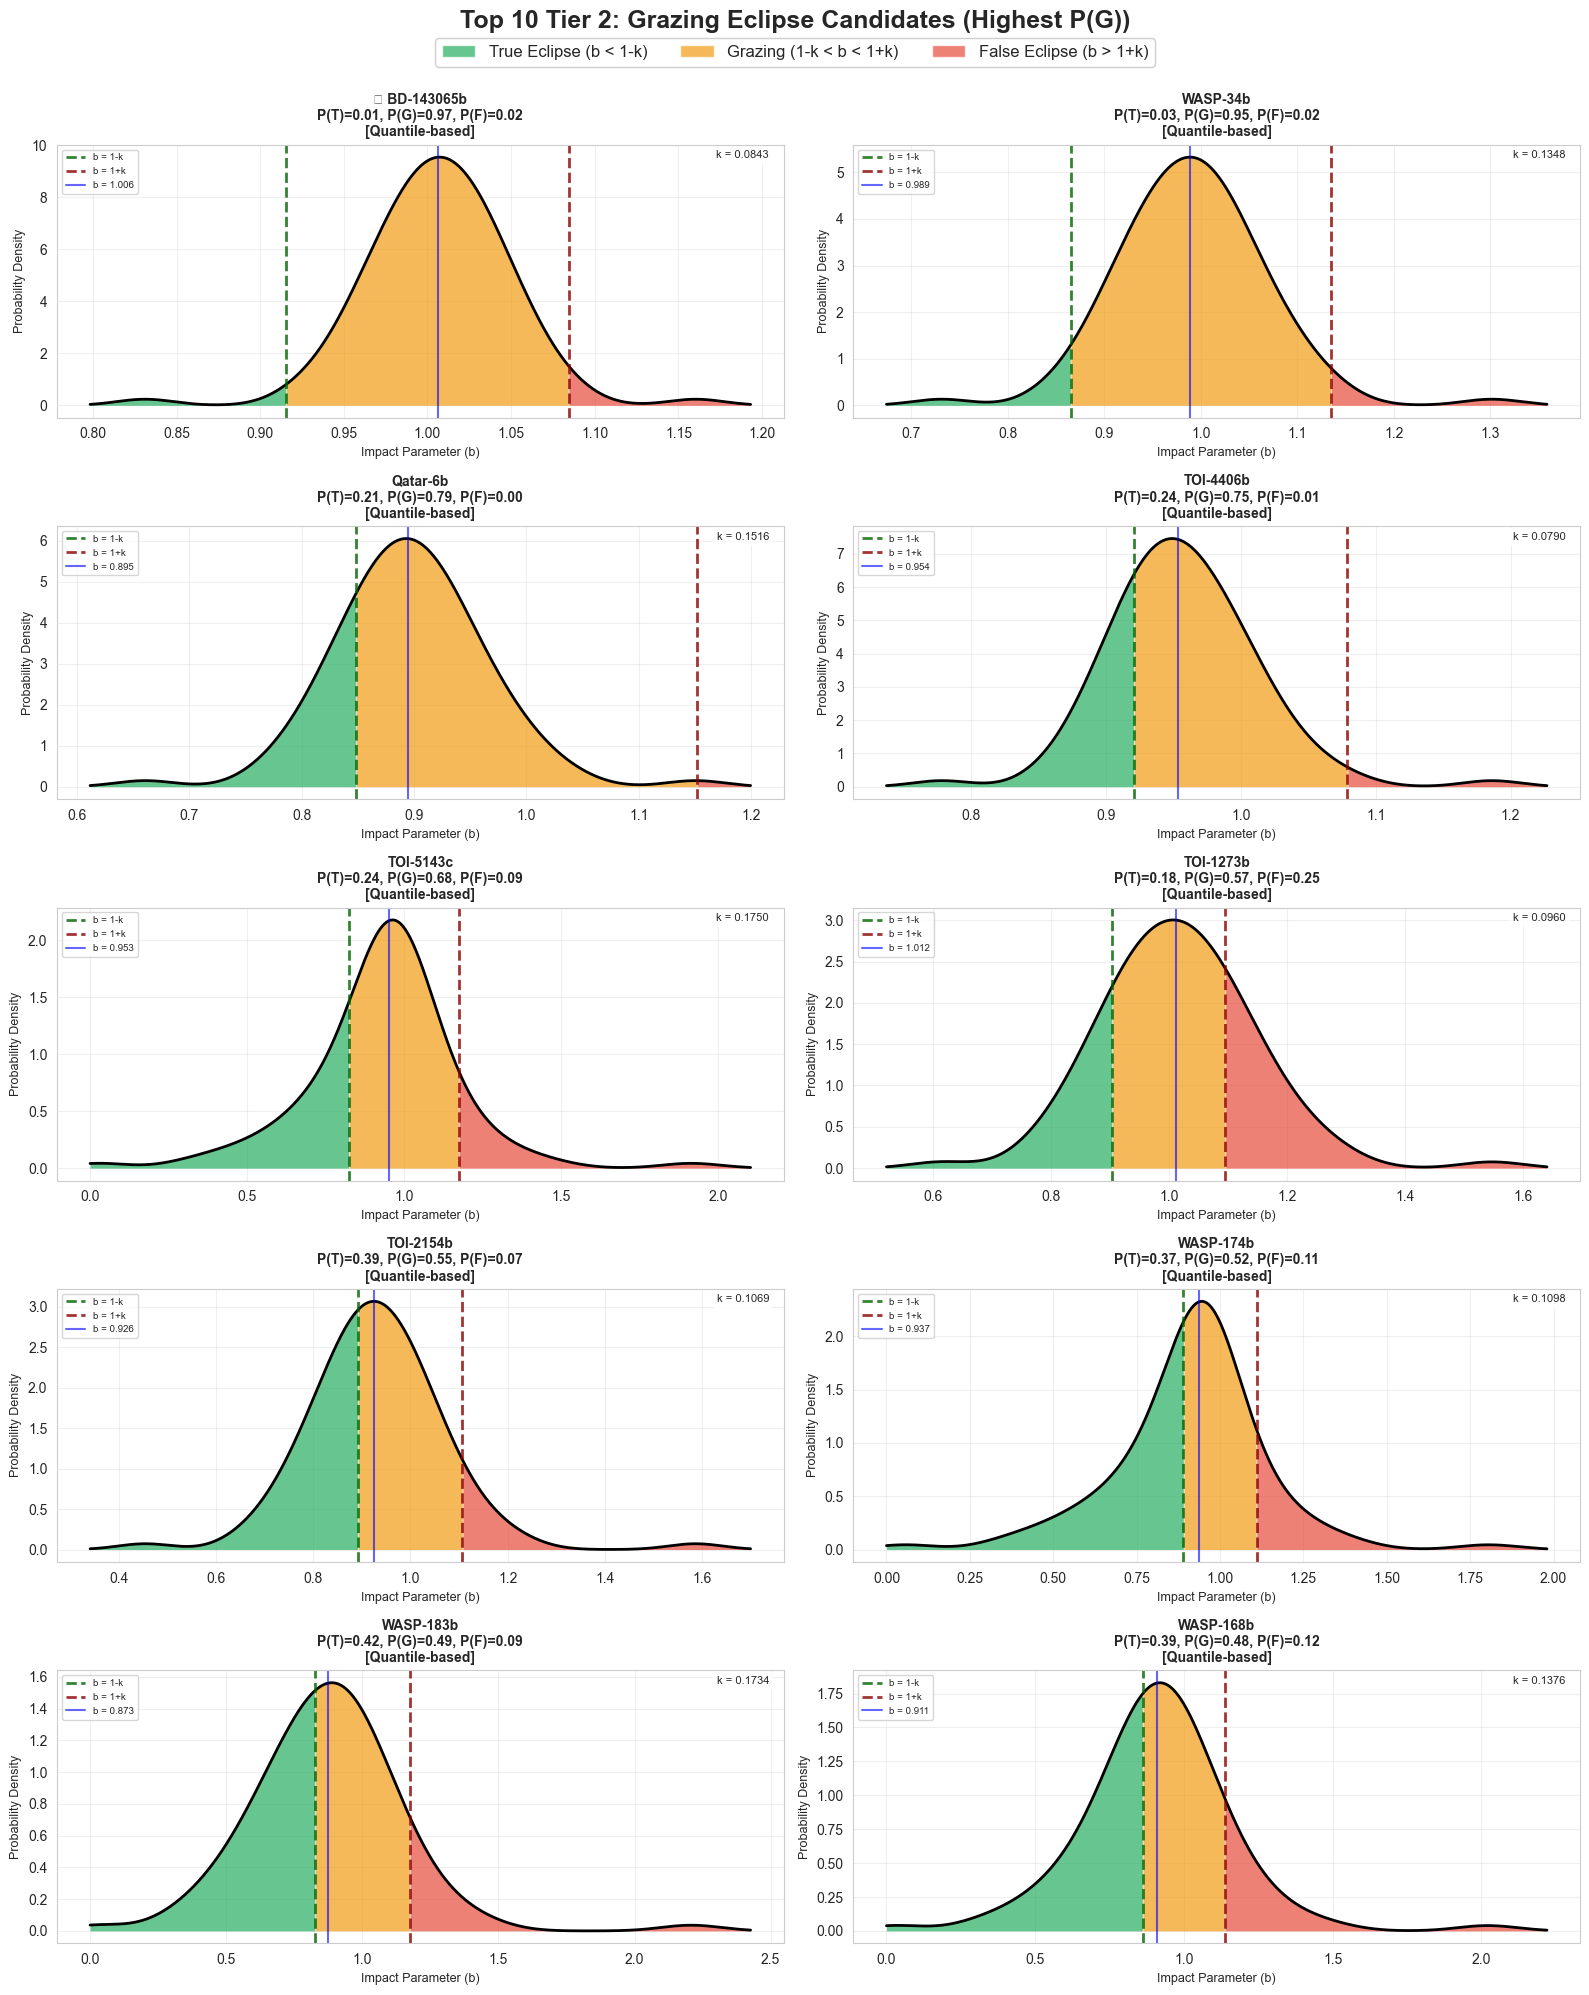


Creating visualization for Top 10 Tier 2 False Eclipse candidates...
✓ Saved: ../results/tier2_top10_false_eclipse.png


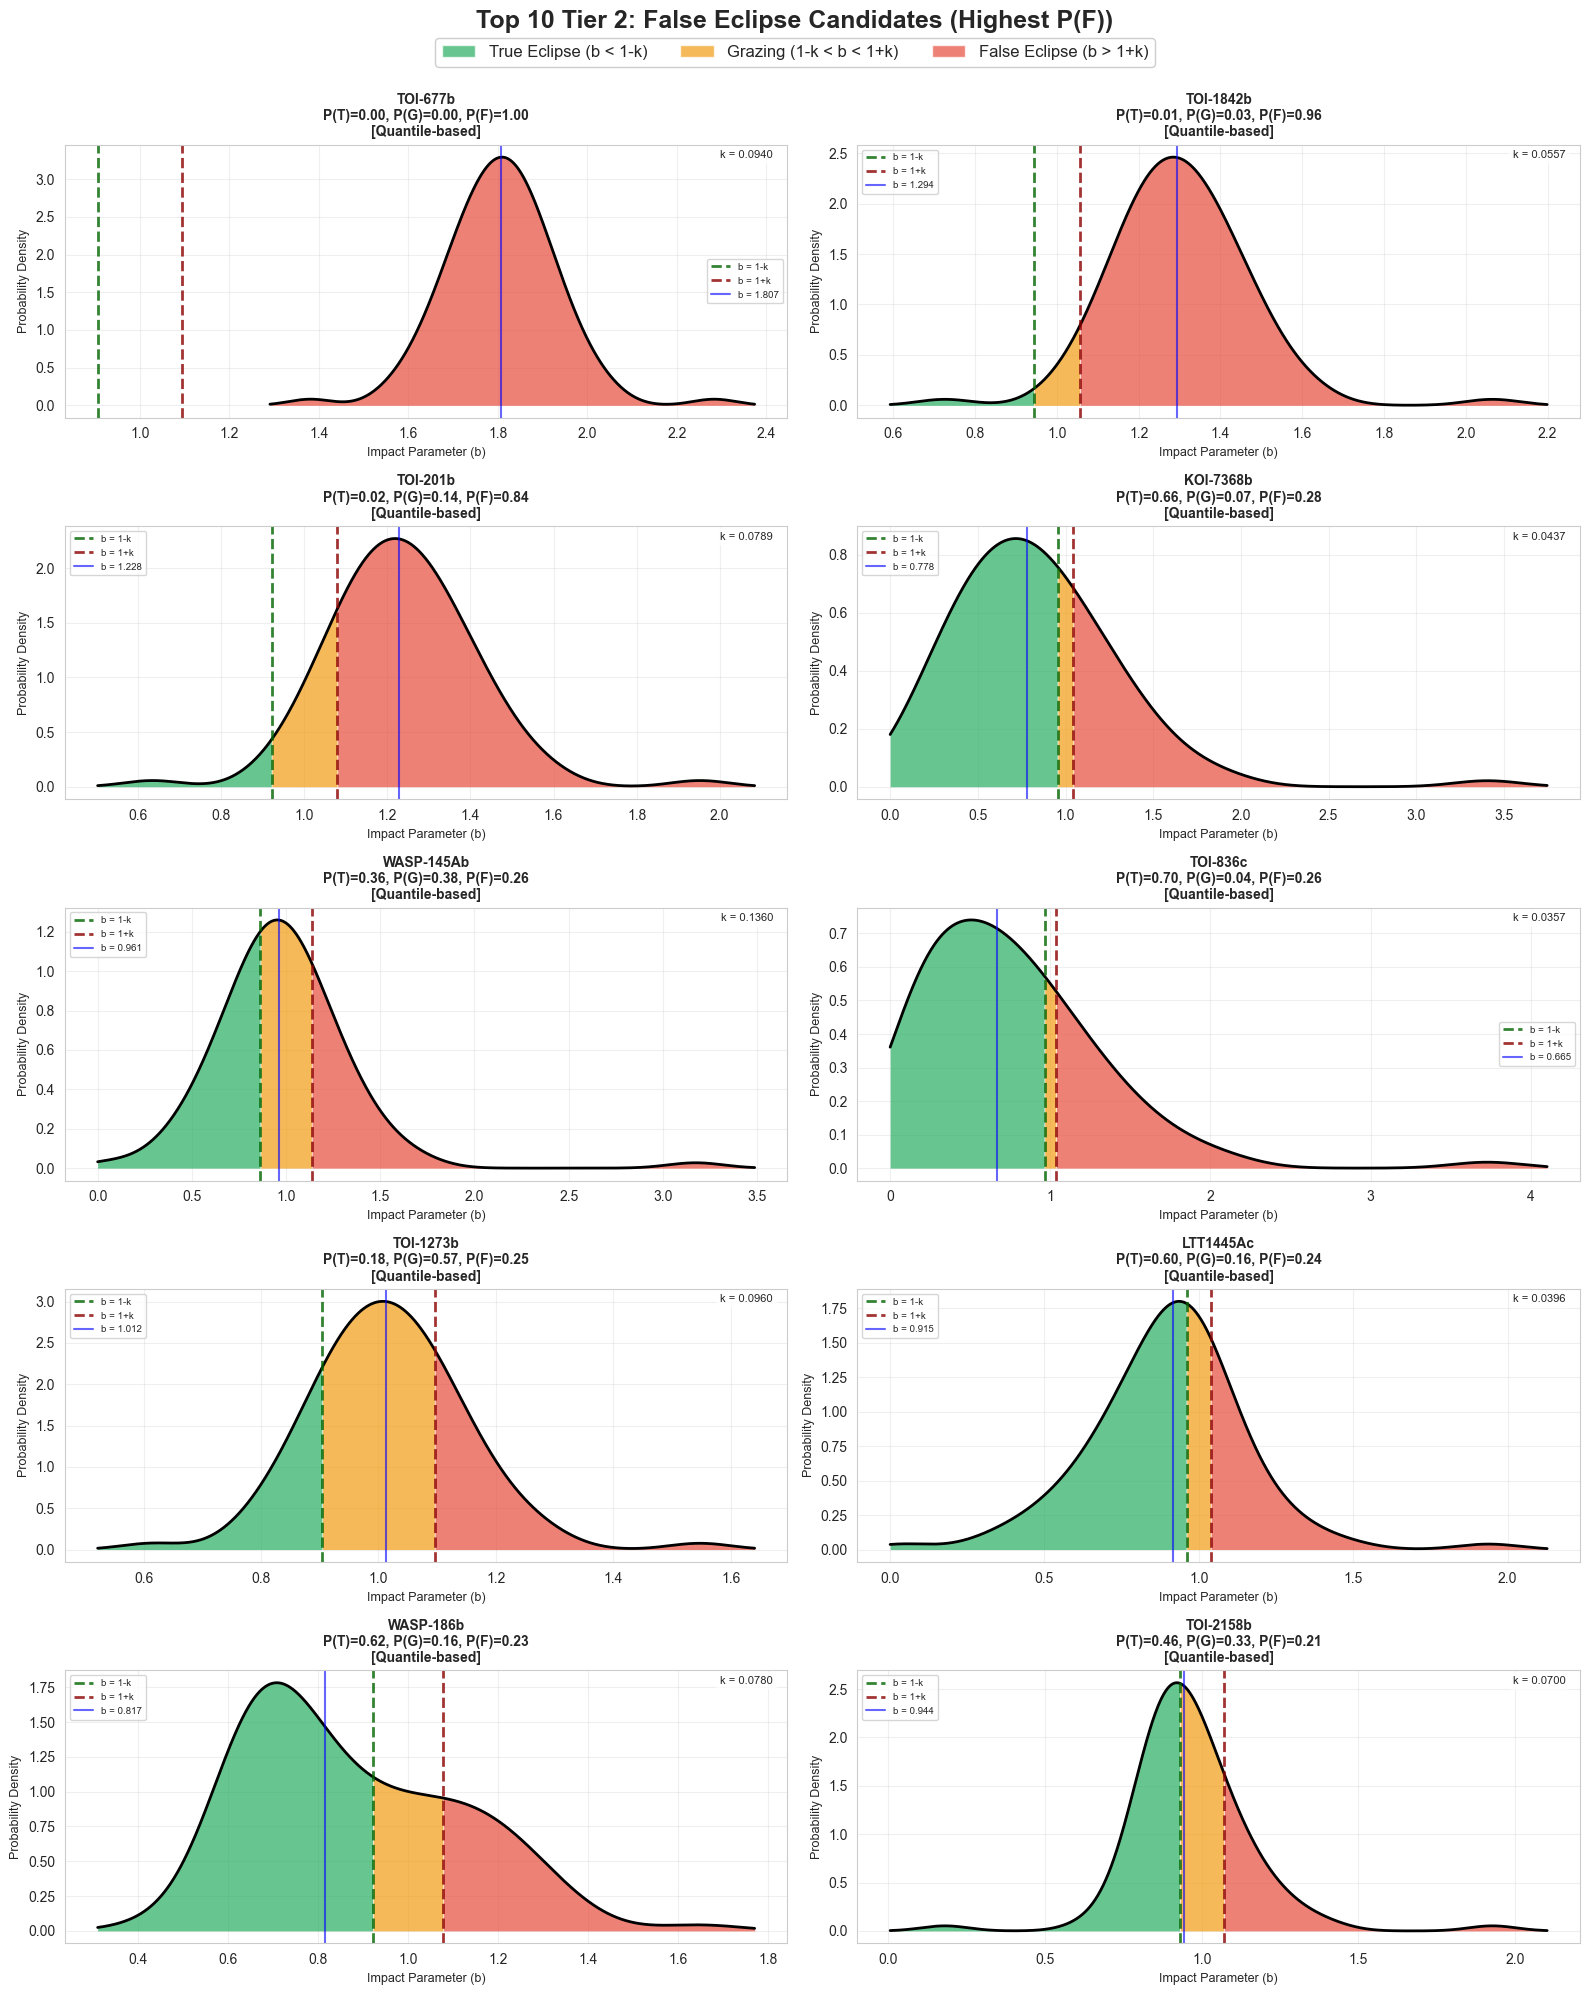


✓ All three Tier 2 Top 10 visualizations completed!


In [6]:
def plot_tier2_top10_by_regime(tier2_data, regime_type, regime_col, tier_label, filename=None):
    """
    Plot top 10 candidates for a specific regime in a 5x2 grid.
    
    Parameters:
    -----------
    tier2_data : DataFrame with candidates
    regime_type : str, 'True', 'Grazing', or 'False'
    regime_col : str, column name for probability (e.g., 'prob_true_eclipse')
    tier_label : str, tier label for title (e.g., 'Tier 2')
    filename : str, path to save figure
    """
    # Get top 10 for this regime
    top_10 = tier2_data.nlargest(10, regime_col)
    
    fig, axes = plt.subplots(5, 2, figsize=(16, 20))
    axes = axes.flatten()
    
    for i, (idx, planet) in enumerate(top_10.iterrows()):
        if i >= 10:
            break
            
        ax = axes[i]
        
        # Get k value
        k = planet['k_rp_rs']
        b_median = planet['b_occ_median']
        
        # Check if we have quantiles
        if pd.notna(planet.get('b_occ_quantiles', np.nan)):
            # Use actual quantile-based posterior
            quantiles = np.array([float(x) for x in planet['b_occ_quantiles'].split(',')])
            
            # Create x range from quantile distribution
            x_min = max(0, quantiles.min() - 0.1 * (quantiles.max() - quantiles.min()))
            x_max = quantiles.max() + 0.1 * (quantiles.max() - quantiles.min())
            x = np.linspace(x_min, x_max, 1000)
            
            # Estimate PDF from quantiles using KDE
            kde = gaussian_kde(quantiles)
            pdf = kde(x)
            
            distribution_type = "Quantile-based"
        else:
            # Fallback to Gaussian approximation
            b_std = (planet['b_occ_84'] - planet['b_occ_16']) / 2.0
            
            # Create x range for plotting
            x_min = max(0, b_median - 4*b_std)
            x_max = b_median + 4*b_std
            x = np.linspace(x_min, x_max, 1000)
            
            # Calculate Gaussian PDF
            pdf = stats.norm.pdf(x, b_median, b_std)
            
            distribution_type = "Gaussian approx."
        
        # Calculate boundaries
        boundary_lower = 1 - k  # True/Grazing boundary
        boundary_upper = 1 + k  # Grazing/False boundary
        
        # Fill regions with different colors
        mask_true = x < boundary_lower
        if mask_true.any():
            ax.fill_between(x[mask_true], 0, pdf[mask_true], 
                           color='#27ae60', alpha=0.7, linewidth=0)
        
        mask_grazing = (x >= boundary_lower) & (x <= boundary_upper)
        if mask_grazing.any():
            ax.fill_between(x[mask_grazing], 0, pdf[mask_grazing], 
                           color='#f39c12', alpha=0.7, linewidth=0)
        
        mask_false = x > boundary_upper
        if mask_false.any():
            ax.fill_between(x[mask_false], 0, pdf[mask_false], 
                           color='#e74c3c', alpha=0.7, linewidth=0)
        
        # Plot the full distribution outline
        ax.plot(x, pdf, 'k-', linewidth=2)
        
        # Add vertical lines for boundaries
        ax.axvline(boundary_lower, ymin=0, ymax=1, color='darkgreen', 
                  linestyle='--', linewidth=2, alpha=0.8, label='b = 1-k')
        ax.axvline(boundary_upper, ymin=0, ymax=1, color='darkred', 
                  linestyle='--', linewidth=2, alpha=0.8, label='b = 1+k')
        
        # Add vertical line for median
        ax.axvline(b_median, ymin=0, ymax=1, color='blue', 
                  linestyle='-', linewidth=1.5, alpha=0.6, label=f'b = {b_median:.3f}')
        
        # Set labels and title
        planet_name = planet['Planet']
        star = '★ ' if planet['eclipse_observed'] else ''
        
        # Get regime probabilities
        p_true = planet['prob_true_eclipse']
        p_grazing = planet['prob_grazing_eclipse']
        p_false = planet['prob_false_eclipse']
        
        ax.set_title(f'{star}{planet_name}\n' + 
                    f'P(T)={p_true:.2f}, P(G)={p_grazing:.2f}, P(F)={p_false:.2f}\n[{distribution_type}]',
                    fontsize=10, fontweight='bold')
        ax.set_xlabel('Impact Parameter (b)', fontsize=9)
        ax.set_ylabel('Probability Density', fontsize=9)
        ax.grid(True, alpha=0.3)
        ax.legend(fontsize=7, loc='best')
        
        # Add text showing k value
        ax.text(0.98, 0.98, f'k = {k:.4f}', 
               transform=ax.transAxes, fontsize=8, va='top', ha='right',
               bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    # Add main title
    fig.suptitle(f'Top 10 {tier_label}: {regime_type} Eclipse Candidates (Highest P({regime_type[0]}))',
                fontsize=18, fontweight='bold', y=0.995)
    
    # Add global legend
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor='#27ae60', alpha=0.7, label='True Eclipse (b < 1-k)'),
        Patch(facecolor='#f39c12', alpha=0.7, label='Grazing (1-k < b < 1+k)'),
        Patch(facecolor='#e74c3c', alpha=0.7, label='False Eclipse (b > 1+k)')
    ]
    fig.legend(handles=legend_elements, loc='upper center', 
              bbox_to_anchor=(0.5, 0.985), ncol=3, fontsize=12, framealpha=0.95)
    
    plt.tight_layout(rect=[0, 0, 1, 0.98])
    
    if filename:
        plt.savefig(filename, dpi=300, bbox_inches='tight')
        print(f"✓ Saved: {filename}")
    
    plt.show()

# Create three separate visualizations for Tier 2
print("="*80)
print("CREATING TOP 10 VISUALIZATIONS BY REGIME - TIER 2")
print("="*80)

print("\nCreating visualization for Top 10 Tier 2 True Eclipse candidates...")
plot_tier2_top10_by_regime(
    tier2_only, 
    'True',
    'prob_true_eclipse',
    'Tier 2',
    '../results/tier2_top10_true_eclipse.png'
)

print("\nCreating visualization for Top 10 Tier 2 Grazing Eclipse candidates...")
plot_tier2_top10_by_regime(
    tier2_only, 
    'Grazing',
    'prob_grazing_eclipse',
    'Tier 2',
    '../results/tier2_top10_grazing_eclipse.png'
)

print("\nCreating visualization for Top 10 Tier 2 False Eclipse candidates...")
plot_tier2_top10_by_regime(
    tier2_only, 
    'False',
    'prob_false_eclipse',
    'Tier 2',
    '../results/tier2_top10_false_eclipse.png'
)

print("\n" + "="*80)
print("✓ All three Tier 2 Top 10 visualizations completed!")
print("="*80)

## 4. Summary Statistics

In [7]:
# Statistics by regime for Tier 2
print("="*80)
print("TIER 2 ECLIPSE CANDIDATES: REGIME STATISTICS")
print("="*80)

print(f"\nMean regime probabilities:")
print(f"  True Eclipse:    {tier2_only['prob_true_eclipse'].mean():.3f}")
print(f"  Grazing Eclipse: {tier2_only['prob_grazing_eclipse'].mean():.3f}")
print(f"  False Eclipse:   {tier2_only['prob_false_eclipse'].mean():.3f}")

print(f"\nMedian regime probabilities:")
print(f"  True Eclipse:    {tier2_only['prob_true_eclipse'].median():.3f}")
print(f"  Grazing Eclipse: {tier2_only['prob_grazing_eclipse'].median():.3f}")
print(f"  False Eclipse:   {tier2_only['prob_false_eclipse'].median():.3f}")

# High confidence cases
print(f"\n" + "-"*80)
print("HIGH CONFIDENCE CLASSIFICATIONS (>80% probability)")
print("-"*80)
high_conf_true = tier2_only[tier2_only['prob_true_eclipse'] > 0.8]
high_conf_grazing = tier2_only[tier2_only['prob_grazing_eclipse'] > 0.8]
high_conf_false = tier2_only[tier2_only['prob_false_eclipse'] > 0.8]

print(f"\nTrue Eclipse (>80%): {len(high_conf_true)} planets")
if len(high_conf_true) > 0:
    print(high_conf_true[['Planet', 'prob_true_eclipse']].to_string(index=False))

print(f"\nGrazing Eclipse (>80%): {len(high_conf_grazing)} planets")
if len(high_conf_grazing) > 0:
    print(high_conf_grazing[['Planet', 'prob_grazing_eclipse']].to_string(index=False))

print(f"\nFalse Eclipse (>80%): {len(high_conf_false)} planets")
if len(high_conf_false) > 0:
    print(high_conf_false[['Planet', 'prob_false_eclipse']].to_string(index=False))

# Statistics by regime for Tier 3
print("\n\n" + "="*80)
print("TIER 3 ECLIPSE CANDIDATES: REGIME STATISTICS")
print("="*80)

print(f"\nMean regime probabilities:")
print(f"  True Eclipse:    {tier3_only['prob_true_eclipse'].mean():.3f}")
print(f"  Grazing Eclipse: {tier3_only['prob_grazing_eclipse'].mean():.3f}")
print(f"  False Eclipse:   {tier3_only['prob_false_eclipse'].mean():.3f}")

print(f"\nMedian regime probabilities:")
print(f"  True Eclipse:    {tier3_only['prob_true_eclipse'].median():.3f}")
print(f"  Grazing Eclipse: {tier3_only['prob_grazing_eclipse'].median():.3f}")
print(f"  False Eclipse:   {tier3_only['prob_false_eclipse'].median():.3f}")

# High confidence cases
print(f"\n" + "-"*80)
print("HIGH CONFIDENCE CLASSIFICATIONS (>80% probability)")
print("-"*80)
high_conf_true_t3 = tier3_only[tier3_only['prob_true_eclipse'] > 0.8]
high_conf_grazing_t3 = tier3_only[tier3_only['prob_grazing_eclipse'] > 0.8]
high_conf_false_t3 = tier3_only[tier3_only['prob_false_eclipse'] > 0.8]

print(f"\nTrue Eclipse (>80%): {len(high_conf_true_t3)} planets")
if len(high_conf_true_t3) > 0:
    print(high_conf_true_t3[['Planet', 'prob_true_eclipse']].to_string(index=False))

print(f"\nGrazing Eclipse (>80%): {len(high_conf_grazing_t3)} planets")
if len(high_conf_grazing_t3) > 0:
    print(high_conf_grazing_t3[['Planet', 'prob_grazing_eclipse']].to_string(index=False))

print(f"\nFalse Eclipse (>80%): {len(high_conf_false_t3)} planets")
if len(high_conf_false_t3) > 0:
    print(high_conf_false_t3[['Planet', 'prob_false_eclipse']].to_string(index=False))

TIER 2 ECLIPSE CANDIDATES: REGIME STATISTICS

Mean regime probabilities:
  True Eclipse:    0.894
  Grazing Eclipse: 0.049
  False Eclipse:   0.022

Median regime probabilities:
  True Eclipse:    0.994
  Grazing Eclipse: 0.002
  False Eclipse:   0.000

--------------------------------------------------------------------------------
HIGH CONFIDENCE CLASSIFICATIONS (>80% probability)
--------------------------------------------------------------------------------

True Eclipse (>80%): 352 planets
         Planet  prob_true_eclipse
        K2-232b            1.00000
      TOI-2977b            1.00000
        KOI-13b            1.00000
       WASP-42b            1.00000
      TOI-3693b            1.00000
      TOI-1136d            1.00000
        HATS-5b            1.00000
       WASP-11b            1.00000
      HAT-P-63b            1.00000
      WASP-105b            1.00000
       Qatar-8b            1.00000
      WASP-116b            1.00000
      TOI-2443b            1.00000
       WA

## 5. Top 10 Tier 2 Candidates by Regime

Visualize the top 10 Tier 2 eclipse candidates for each regime type separately.

In [ ]:
def plot_tier2_top10_by_regime(tier2_data, regime_type, regime_col, tier_label, filename=None):
    """
    Plot top 10 candidates for a specific regime in a 5x2 grid.
    
    Parameters:
    -----------
    tier2_data : DataFrame with candidates
    regime_type : str, 'True', 'Grazing', or 'False'
    regime_col : str, column name for probability (e.g., 'prob_true_eclipse')
    tier_label : str, tier label for title (e.g., 'Tier 2')
    filename : str, path to save figure
    """
    # Get top 10 for this regime
    top_10 = tier2_data.nlargest(10, regime_col)
    
    fig, axes = plt.subplots(5, 2, figsize=(16, 20))
    axes = axes.flatten()
    
    for i, (idx, planet) in enumerate(top_10.iterrows()):
        if i >= 10:
            break
            
        ax = axes[i]
        
        # Get k value
        k = planet['k_rp_rs']
        b_median = planet['b_occ_median']
        
        # Check if we have quantiles
        if pd.notna(planet.get('b_occ_quantiles', np.nan)):
            # Use actual quantile-based posterior
            quantiles = np.array([float(x) for x in planet['b_occ_quantiles'].split(',')])
            
            # Create x range from quantile distribution
            x_min = max(0, quantiles.min() - 0.1 * (quantiles.max() - quantiles.min()))
            x_max = quantiles.max() + 0.1 * (quantiles.max() - quantiles.min())
            x = np.linspace(x_min, x_max, 1000)
            
            # Estimate PDF from quantiles using KDE
            kde = gaussian_kde(quantiles)
            pdf = kde(x)
            
            distribution_type = "Quantile-based"
        else:
            # Fallback to Gaussian approximation
            b_std = (planet['b_occ_84'] - planet['b_occ_16']) / 2.0
            
            # Create x range for plotting
            x_min = max(0, b_median - 4*b_std)
            x_max = b_median + 4*b_std
            x = np.linspace(x_min, x_max, 1000)
            
            # Calculate Gaussian PDF
            pdf = stats.norm.pdf(x, b_median, b_std)
            
            distribution_type = "Gaussian approx."
        
        # Calculate boundaries
        boundary_lower = 1 - k  # True/Grazing boundary
        boundary_upper = 1 + k  # Grazing/False boundary
        
        # Fill regions with different colors
        mask_true = x < boundary_lower
        if mask_true.any():
            ax.fill_between(x[mask_true], 0, pdf[mask_true], 
                           color='#27ae60', alpha=0.7, linewidth=0)
        
        mask_grazing = (x >= boundary_lower) & (x <= boundary_upper)
        if mask_grazing.any():
            ax.fill_between(x[mask_grazing], 0, pdf[mask_grazing], 
                           color='#f39c12', alpha=0.7, linewidth=0)
        
        mask_false = x > boundary_upper
        if mask_false.any():
            ax.fill_between(x[mask_false], 0, pdf[mask_false], 
                           color='#e74c3c', alpha=0.7, linewidth=0)
        
        # Plot the full distribution outline
        ax.plot(x, pdf, 'k-', linewidth=2)
        
        # Add vertical lines for boundaries
        ax.axvline(boundary_lower, ymin=0, ymax=1, color='darkgreen', 
                  linestyle='--', linewidth=2.5, alpha=0.8, label='b = 1-k')
        ax.axvline(boundary_upper, ymin=0, ymax=1, color='darkred', 
                  linestyle='--', linewidth=2.5, alpha=0.8, label='b = 1+k')
        
        # Add vertical line for median
        ax.axvline(b_median, ymin=0, ymax=1, color='blue', 
                  linestyle='-', linewidth=2, alpha=0.6, label=f'b = {b_median:.3f}')
        
        # Set labels and title
        planet_name = planet['Planet']
        star = '★ ' if planet['eclipse_observed'] else ''
        prob_val = planet[regime_col]
        
        # Get regime probabilities for percentages
        p_true = planet['prob_true_eclipse']
        p_grazing = planet['prob_grazing_eclipse']
        p_false = planet['prob_false_eclipse']
        
        ax.set_title(f'{star}{planet_name}\n' + 
                    f'P({regime_type[0]}) = {prob_val:.3f}',
                    fontsize=12, fontweight='bold', pad=10)
        ax.set_xlabel('Impact Parameter (b)', fontsize=11, fontweight='bold')
        ax.set_ylabel('Probability Density', fontsize=11, fontweight='bold')
        ax.grid(True, alpha=0.3)
        ax.legend(fontsize=8, loc='best')
        
        # Add percentage text in each region
        y_max = pdf.max()
        if mask_true.any():
            x_mid_true = x[mask_true].mean()
            ax.text(x_mid_true, y_max * 0.5, f'{p_true*100:.1f}%', 
                   fontsize=10, ha='center', va='center', fontweight='bold',
                   color='darkgreen', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
        if mask_grazing.any():
            x_mid_grazing = x[mask_grazing].mean()
            ax.text(x_mid_grazing, y_max * 0.5, f'{p_grazing*100:.1f}%', 
                   fontsize=10, ha='center', va='center', fontweight='bold',
                   color='darkorange', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
        if mask_false.any():
            x_mid_false = x[mask_false].mean()
            ax.text(x_mid_false, y_max * 0.5, f'{p_false*100:.1f}%', 
                   fontsize=10, ha='center', va='center', fontweight='bold',
                   color='darkred', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
        
        # Add text showing k value
        ax.text(0.98, 0.98, f'k = {k:.4f}', 
               transform=ax.transAxes, fontsize=9, va='top', ha='right',
               bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    # Add main title
    fig.suptitle(f'Top 10 {tier_label}: {regime_type} Eclipse Candidates (Highest P({regime_type[0]}))',
                fontsize=18, fontweight='bold', y=0.995)
    
    # Add global legend
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor='#27ae60', alpha=0.7, label='True Eclipse (b < 1-k)'),
        Patch(facecolor='#f39c12', alpha=0.7, label='Grazing (1-k < b < 1+k)'),
        Patch(facecolor='#e74c3c', alpha=0.7, label='False Eclipse (b > 1+k)')
    ]
    fig.legend(handles=legend_elements, loc='upper center', 
              bbox_to_anchor=(0.5, 0.985), ncol=3, fontsize=12, framealpha=0.95)
    
    plt.tight_layout(rect=[0, 0, 1, 0.98])
    
    if filename:
        plt.savefig(filename, dpi=300, bbox_inches='tight')
        print(f"✓ Saved: {filename}")
    
    plt.show()

# Create three separate visualizations for Tier 2
print("="*80)
print("CREATING TOP 10 VISUALIZATIONS BY REGIME - TIER 2")
print("="*80)

print("\nCreating visualization for Top 10 Tier 2 True Eclipse candidates...")
plot_tier2_top10_by_regime(
    tier2_only, 
    'True',
    'prob_true_eclipse',
    'Tier 2',
    '../results/tier2_top10_true_eclipse.png'
)

print("\nCreating visualization for Top 10 Tier 2 Grazing Eclipse candidates...")
plot_tier2_top10_by_regime(
    tier2_only, 
    'Grazing',
    'prob_grazing_eclipse',
    'Tier 2',
    '../results/tier2_top10_grazing_eclipse.png'
)

print("\nCreating visualization for Top 10 Tier 2 False Eclipse candidates...")
plot_tier2_top10_by_regime(
    tier2_only, 
    'False',
    'prob_false_eclipse',
    'Tier 2',
    '../results/tier2_top10_false_eclipse.png'
)

print("\n" + "="*80)
print("✓ All three Tier 2 Top 10 visualizations completed!")
print("="*80)

SyntaxError: invalid syntax (1511061929.py, line 167)

## 6. Top 10 Tier 3 Candidates by Regime

Visualize the top 10 Tier 3 eclipse candidates for each regime type separately.

In [ ]:
# Create three separate visualizations for Tier 3
print("="*80)
print("CREATING TOP 10 VISUALIZATIONS BY REGIME - TIER 3")
print("="*80)

print("\nCreating visualization for Top 10 Tier 3 True Eclipse candidates...")
plot_tier2_top10_by_regime(
    tier3_only, 
    'True',
    'prob_true_eclipse',
    'Tier 3',
    '../results/tier3_top10_true_eclipse.png'
)

print("\nCreating visualization for Top 10 Tier 3 Grazing Eclipse candidates...")
plot_tier2_top10_by_regime(
    tier3_only, 
    'Grazing',
    'prob_grazing_eclipse',
    'Tier 3',
    '../results/tier3_top10_grazing_eclipse.png'
)

print("\nCreating visualization for Top 10 Tier 3 False Eclipse candidates...")
plot_tier2_top10_by_regime(
    tier3_only, 
    'False',
    'prob_false_eclipse',
    'Tier 3',
    '../results/tier3_top10_false_eclipse.png'
)

print("\n" + "="*80)
print("✓ All three Tier 3 Top 10 visualizations completed!")
print("="*80)

## 7. Save Tier 2 and Tier 3 Candidates Lists

In [ ]:
# Save tier 2 candidates to CSV
output_cols = ['Planet', 'eclipse_observed', 'b_occ_median', 'b_occ_16', 'b_occ_84',
               'k_rp_rs', 'Max Tier',
               'prob_false_eclipse', 'prob_grazing_eclipse', 'prob_true_eclipse', 'dominant_regime']

tier2_output = tier2_only[output_cols].copy()
tier2_output = tier2_output.sort_values('prob_true_eclipse', ascending=False)

output_path_tier2 = '../results/tier2_eclipse_candidates.csv'
tier2_output.to_csv(output_path_tier2, index=False)

# Save tier 3 candidates to CSV
tier3_output = tier3_only[output_cols].copy()
tier3_output = tier3_output.sort_values('prob_true_eclipse', ascending=False)

output_path_tier3 = '../results/tier3_eclipse_candidates.csv'
tier3_output.to_csv(output_path_tier3, index=False)

print("="*80)
print("RESULTS SAVED")
print("="*80)
print(f"\n✓ Tier 2 candidates list: {output_path_tier2}")
print(f"✓ Tier 2 distributions plot: ../results/tier2_eclipse_candidates_distributions.png")
print(f"  Total Tier 2 candidates: {len(tier2_output)}")
print(f"\n✓ Tier 3 candidates list: {output_path_tier3}")
print(f"✓ Tier 3 distributions plot: ../results/tier3_eclipse_candidates_distributions.png")
print(f"  Total Tier 3 candidates: {len(tier3_output)}")